In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from learn import *

Train on full dataset for several epochs

In [1]:
%%time
%run script 0 --gpu_start=0 --num_gpus=2 --bs=80 --lr 1e-7 --num_slice=9 \
    --use_wd_sched --wd 0.025 --n_cycles 3 --model_name unet
# --start --learn

CPU times: user 1.69 s, sys: 608 ms, total: 2.3 s
Wall time: 7.52 s


In [2]:
data = None

In [7]:
is_eval, is_pred = False, False
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

Data finished loading: data/train/AOI_2_Vegas_Train


In [8]:
learn.freeze_to(1)

In [4]:
learn.lr_find()

 60%|██████    | 79/131 [01:25<00:56,  1.08s/it, loss=14]  

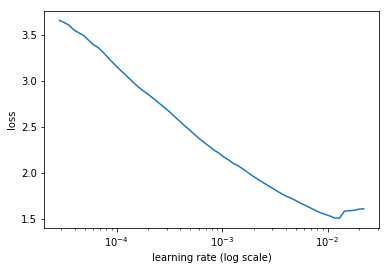

In [5]:
learn.sched.plot()

  0%|          | 0/131 [00:00<?, ?it/s]


Exception in thread Thread-242:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      0.758      0.664322   0.89644    0.408171   0.579849  
    1      0.710016   0.623703   0.904384   0.402822   0.593979  
    2      0.673139   0.602182   0.901446   0.408063   0.609044  
    3      0.726187   0.684086   0.877162   0.415407   0.58162   
    4      0.685859   0.602466   0.907109   0.402663   0.602523  
    5      0.665955   0.590601   0.907966   0.403434   0.609698  
    6      0.648753   0.587226   0.9039     0.407523   0.616477  



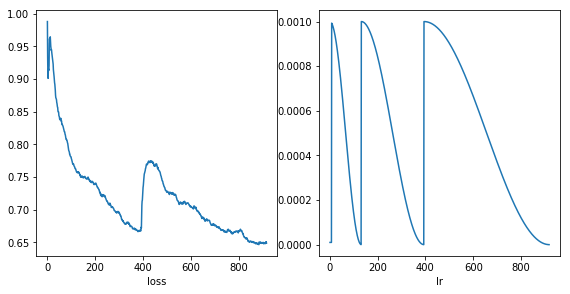

In [10]:
lr = 1e-3
lrs = np.array([lr / 9, lr])
wd = args.wd
wds = np.array([wd / 3, wd])
use_wd_sched = True

train_and_plot(learn, 0, 'ternaus-full', lrs = lrs, n_cycles=3, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      0.642775   0.577002   0.906508   0.405699   0.619355  
    1      0.635444   0.577996   0.904137   0.407534   0.62201   
    2      0.630283   0.567566   0.907768   0.405712   0.624259  
    3      0.631093   0.586557   0.916639   0.397663   0.604746  
    4      0.623047   0.552206   0.909213   0.406765   0.63267   
    5      0.615055   0.554318   0.907737   0.40618    0.632466  
    6      0.617787   0.549161   0.910359   0.405578   0.633225  



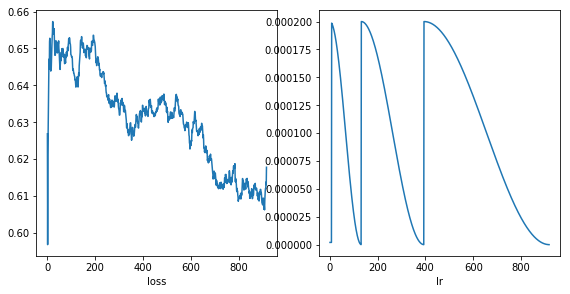

In [12]:
lrs /= 5
train_and_plot(learn, 0, 'ternaus-full', lrs = lrs, n_cycles=3, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

In [ ]:
learn.unfreeze()
train_and_plot(learn, 1, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Paris

In [ ]:
data = None
datapath = datapaths[1]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=25, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

In [ ]:
train_and_plot(learn, 2, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Shanghai

In [ ]:
data = None
datapath = datapaths[2]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

In [ ]:
train_and_plot(learn, 3, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Khartoum

In [ ]:
data = None
datapath = datapaths[3]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

In [ ]:
train_and_plot(learn, 4, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')